In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\datasets\imdb.csv")
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,NaN,positive
49996,NaN,negative
49997,NaN,negative
49998,NaN,negative


In [3]:
data[:537]

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
532,"I read the book before seeing the movie, and t...",positive
533,"DOCTEUR PETIOT, starring Michel Serrault, is a...",positive
534,I just got this video used and I was watching ...,positive
535,NaN,NaN


In [4]:
data = data[:535]
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
530,I gave this a 1. There are so many plot twists...,negative
531,Not an easy film to like at first with both th...,positive
532,"I read the book before seeing the movie, and t...",positive
533,"DOCTEUR PETIOT, starring Michel Serrault, is a...",positive


In [5]:
categories = ["positive","negative"]

In [6]:
x = data[["review","sentiment"]]

In [7]:
import string
def remove_punctuation(text):
    punctuationless="".join([i for i in text if i not in string.punctuation])
    return punctuationless
x.review = x.review.apply(lambda x:remove_punctuation(x))

In [8]:
def remove_numbers(text):
    numberless = "".join([i for i in text if type(i)!=int])
    return numberless
x.review = x.review.apply(lambda x:remove_numbers(x))

In [33]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(x, test_size = 0.3, random_state = 1)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model=make_pipeline(TfidfVectorizer(),MultinomialNB())
model.fit(train.review,train.sentiment)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [35]:
pred = model.predict(test.review)
pred

array(['positive', 'negative', 'negative', 'negative', 'negative',
       'negative', 'positive', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'positive', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'positive', 'negative', 'negative',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negati

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Testing Accuracy : {:.2f}%".format(accuracy_score(test.sentiment,pred)*100))

Testing Accuracy : 64.60%


In [37]:
print("Taining Accuracy : {:.2f}%".format(accuracy_score(train.sentiment, model.predict(train.review))*100))

Taining Accuracy : 94.65%


Text(0.5, 1.0, 'Confusion Matrix')

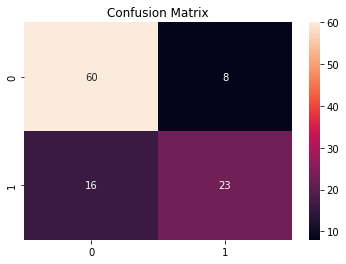

In [14]:
cm = confusion_matrix(test.sentiment,pred)
sns.heatmap(cm,annot = True)
plt.title("Confusion Matrix")

In [15]:
new_review1 = ["This film has no logic at all. Very bad screenplay. Especially the climax fight scene was no at all acceptable."]
model.predict(new_review1)

array(['negative'], dtype='<U8')

In [38]:
new_review2 = ["This film gives a good feel. It takes us back to the school life where we were so happy. As a whole it is a nice film"]
model.predict(new_review2)

array(['negative'], dtype='<U8')

In [39]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3, random_state = 1)

In [40]:
param_list = dict()
param_list['alpha'] = [1,2,3,4,5]
param_list['force_alpha'] = ['True','False']
param_list['fit_prior'] = ['True','False']

In [43]:
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(model, param_list, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
result = search.fit(train.review, train.sentiment)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 20 is smaller than n_iter=500. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


ValueError: Invalid parameter 'force_alpha' for estimator Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())]). Valid parameters are: ['memory', 'steps', 'verbose'].